### **Task 1: Load and Explore the Data**
Load the dataset into a pandas DataFrame and explore its basic structure to understand the data you will work with.

In [78]:
import pandas as pd

# Load the data
df = pd.read_csv('win_back.csv')

# Display the first few rows
df.head()

,customer_id,unsub_date,re_engagement_date,user_tenure,num_logins_last_30_days,num_transactions_last_30_days,customer_segment,campaign_type,discount_offered,prev_winback_success,app_usage_time,winback_propensity_score,winback_success
0,67d96571-b3d0-4546-81f4-b0397c5abed2,2023-05-07,2023-08-12,171,7,1,Low-Value,SMS,10.51,0,353,0.503,0
1,fb955682-96af-4fde-b29a-872aec73814b,2023-03-29,2023-05-11,1098,9,2,Medium-Value,Push Notification,17.64,0,172,0.164,0
2,35f315bb-252d-40e8-ba08-25527ceb0f54,2023-08-24,2023-10-10,480,16,6,High-Value,Push Notification,22.59,0,367,0.180,0
3,28083de5-fd0e-405b-8581-d1e433e25311,2023-12-12,2023-10-18,333,9,3,Medium-Value,SMS,13.63,0,304,0.745,0
4,04e6f637-b382-499f-b223-d3f9a90e3abf,2023-06-27,2023-04-25,61,20,2,Medium-Value,SMS,26.83,0,250,0.914,1


In [80]:
# Check the data types and missing values
df.info()

# TODO: Explore the dataset further by checking unique values for each column using df.nunique().

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    10000 non-null  object 
 1   unsub_date                     10000 non-null  object 
 2   re_engagement_date             8978 non-null   object 
 3   user_tenure                    10000 non-null  int64  
 4   num_logins_last_30_days        10000 non-null  int64  
 5   num_transactions_last_30_days  10000 non-null  int64  
 6   customer_segment               10000 non-null  object 
 7   campaign_type                  10000 non-null  object 
 8   discount_offered               9519 non-null   float64
 9   prev_winback_success           10000 non-null  int64  
 10  app_usage_time                 10000 non-null  int64  
 11  winback_propensity_score       10000 non-null  float64
 12  winback_success                10000 non-null  

### **Task 2: Summary Statistics**
Generate summary statistics to understand the spread and central tendencies of the numerical data.

In [83]:
# Generate summary statistics for numerical columns
df.describe()

# TODO: Check summary statistics for categorical columns using df.describe(include=['object']).

,user_tenure,num_logins_last_30_days,num_transactions_last_30_days,discount_offered,prev_winback_success,app_usage_time,winback_propensity_score,winback_success
count,10000.000000,10000.000000,10000.000000,9519.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,356.289100,14.569400,2.991400,17.488039,0.095900,300.836000,0.495337,0.222300
std,355.655063,4.978701,1.718669,7.289595,0.294469,99.579296,0.287849,0.415812
min,0.000000,1.000000,0.000000,5.000000,0.000000,50.000000,0.000000,0.000000
25%,103.000000,11.000000,2.000000,11.090000,0.000000,234.000000,0.244000,0.000000
50%,247.000000,15.000000,3.000000,17.550000,0.000000,300.000000,0.495000,0.000000
75%,491.250000,18.000000,4.000000,23.880000,0.000000,367.000000,0.741000,0.000000
max,2982.000000,30.000000,13.000000,30.000000,1.000000,600.000000,1.000000,1.000000


### **Task 3: Missing Values Check**
Identify missing values in the dataset and quantify them to determine if further cleaning is required.

In [86]:
# Check for missing values in each column
df.isnull().sum()

# TODO: Create a heatmap to visualize missing data using seaborn's heatmap function.

customer_id                         0
unsub_date                          0
re_engagement_date               1022
user_tenure                         0
num_logins_last_30_days             0
num_transactions_last_30_days       0
customer_segment                    0
campaign_type                       0
discount_offered                  481
prev_winback_success                0
app_usage_time                      0
winback_propensity_score            0
winback_success                     0
dtype: int64

### **Task 4: Distribution of the Target Variable**
Analyze the distribution of the target variable (`winback_success`) to understand the class balance.

In [89]:
# Check the distribution of the target variable
df['winback_success'].value_counts(normalize=True)

# TODO: Plot the target variable distribution using a bar chart.

0    0.7777
1    0.2223
Name: winback_success, dtype: float64

### **Task 5: Visualize Numerical Features**
Visualize the distribution of key numerical features to identify trends, skewness, and potential outliers.

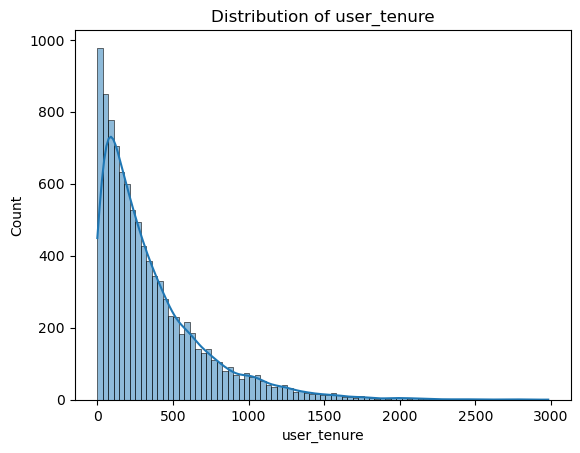

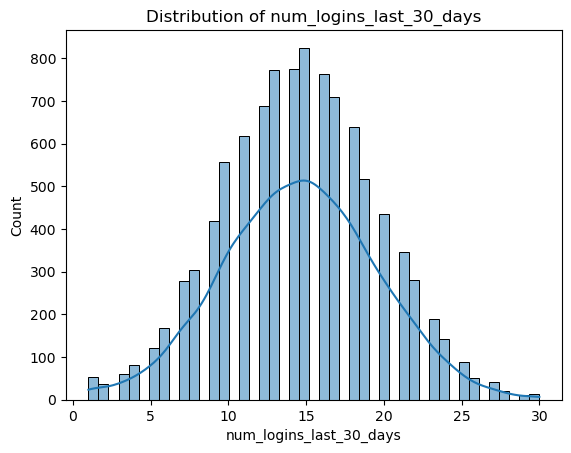

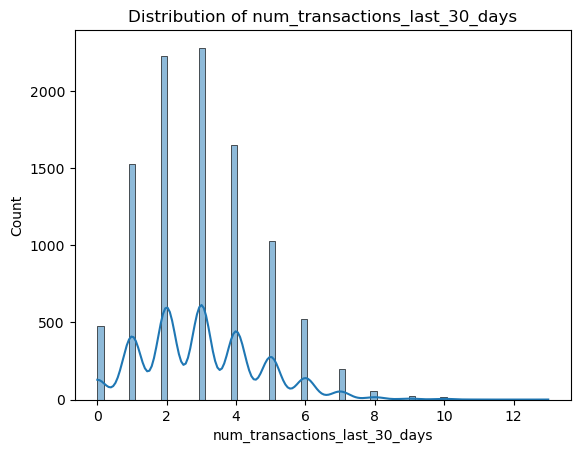

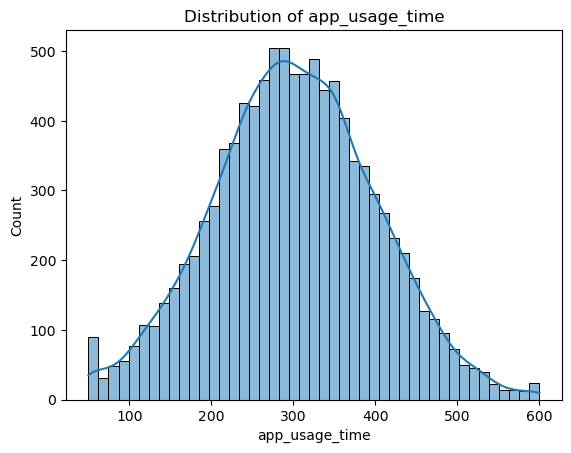

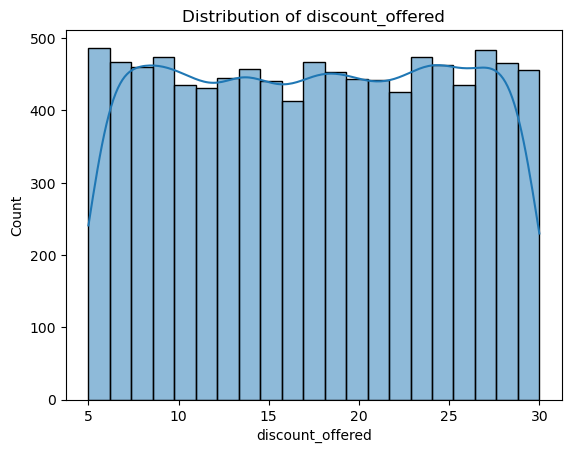

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
num_cols = ['user_tenure', 'num_logins_last_30_days', 'num_transactions_last_30_days', 'app_usage_time', 'discount_offered']

for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# TODO: Experiment with different bins in histograms to better visualize the data.


### Task 6: Outlier Detection (Numerical Features)
Use boxplots to detect outliers in the numerical features, which can distort model performance.

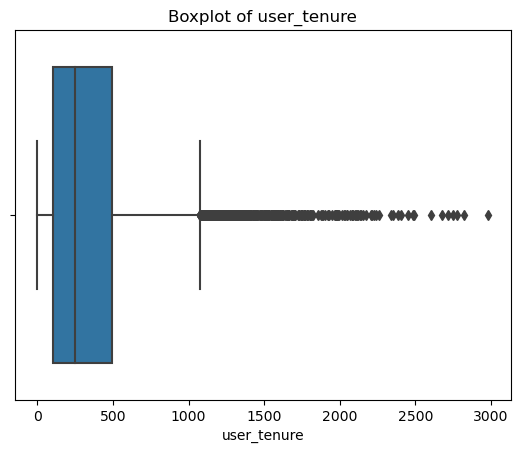

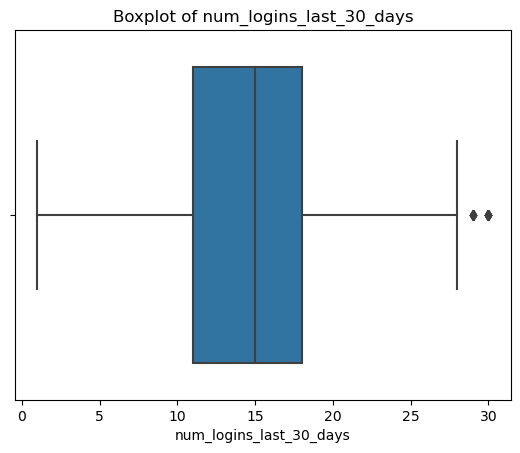

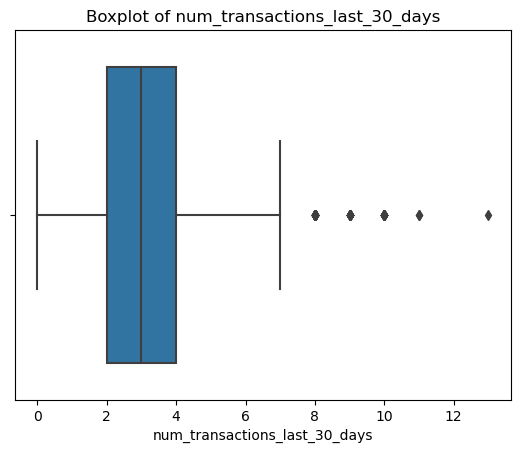

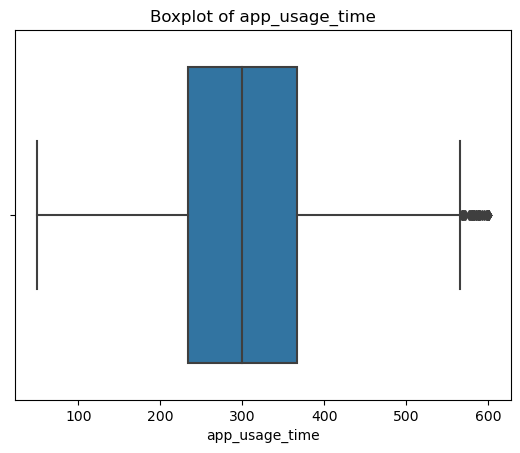

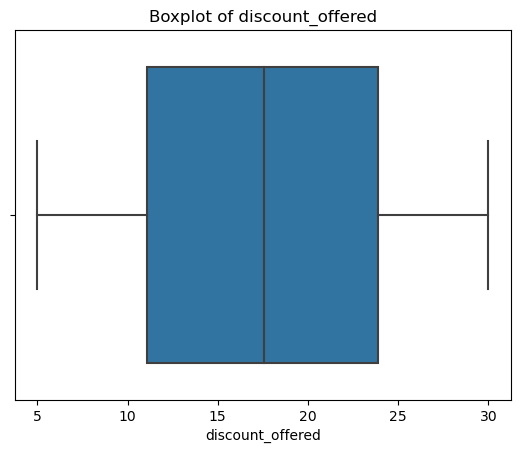

In [94]:
# Plot boxplots to detect outliers in numerical features
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# TODO: Learn about other outlier detection methods like Z-score and Mahalanobis distance.

### **Task 7: Categorical Features Analysis**
Examine the distribution of categorical features to get insights into the variety of values present in each.

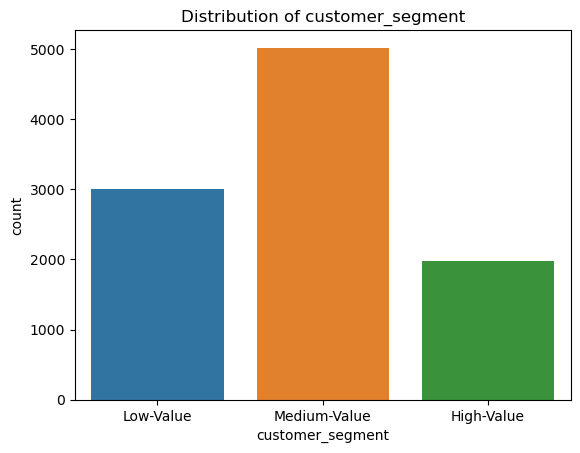

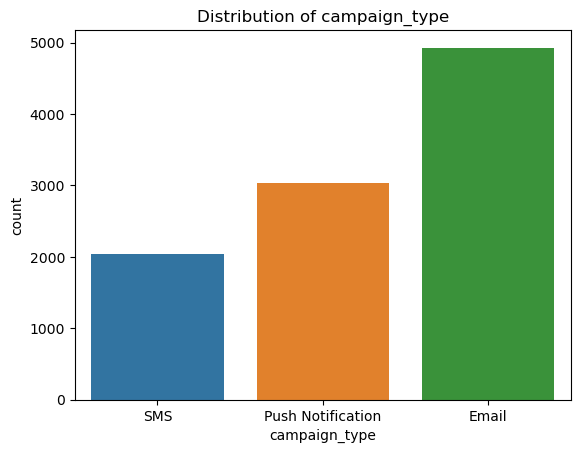

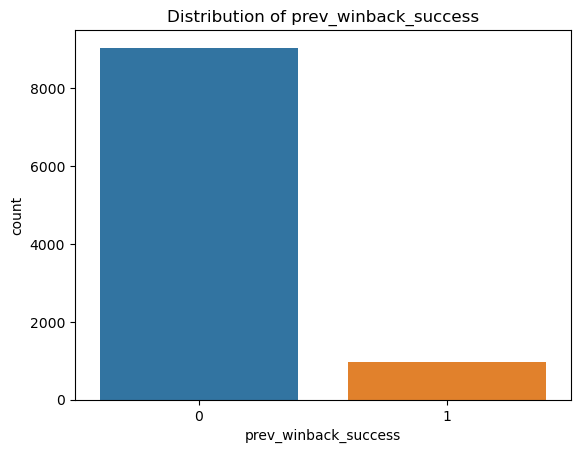

In [97]:
# Plot bar charts for categorical columns
cat_cols = ['customer_segment', 'campaign_type', 'prev_winback_success']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# TODO: Explore using pie charts or stacked bar charts for categorical analysis.

### **Task 8: Handle Missing Data**
Handle missing data by imputing or dropping missing values to ensure a clean dataset for model building.

In [100]:
# Fill missing values in 'discount_offered' with the median
df['discount_offered'].fillna(df['discount_offered'].median(), inplace=True)

# Drop rows with missing 're_engagement_date'
df.dropna(subset=['re_engagement_date'], inplace=True)

# TODO: Try other imputation methods like mean or K-Nearest Neighbors (KNN) imputation for continuous variables.

### **Task 9: Outlier Removal**
Remove outliers using the Interquartile Range (IQR) method to ensure that extreme values don't skew model results.

In [104]:
# Remove outliers using the IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where any numerical feature falls outside the IQR bounds
df_filtered = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# TODO: Explore how to handle outliers using techniques like Winsorization or capping.

### **Task 10: Feature Engineering**
Create new features such as the time between unsubscription and re-engagement to add more predictive power.

In [107]:
# Convert date columns to datetime
df['unsub_date'] = pd.to_datetime(df['unsub_date'])
df['re_engagement_date'] = pd.to_datetime(df['re_engagement_date'])

# Create a new feature: days_until_re_engagement
df['days_until_re_engagement'] = (df['re_engagement_date'] - df['unsub_date']).dt.days

# TODO: Create other features such as interaction terms or scaling numerical columns.

### **Task 11: Train-Test Split**
Split the dataset into training and testing sets for model building and evaluation.

In [110]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_filtered[['user_tenure', 'num_logins_last_30_days', 'num_transactions_last_30_days', 'app_usage_time', 'discount_offered', 'prev_winback_success', 'days_until_re_engagement']]
y = df_filtered['winback_success']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TODO: Try different test sizes (e.g., 30%) and see how it affects model performance.

KeyError: "['days_until_re_engagement'] not in index"

### **Task 12: Build a Classification Model**
Build a logistic regression model to predict win-back success.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# TODO: Explore other classification algorithms like Random Forest, Decision Trees, or XGBoost.

### **Task 13: Model Evaluation**
Evaluate the performance of the model using accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# TODO: Learn about other metrics like ROC-AUC and confusion matrix for a deeper understanding of model performance.

### **Task 14: Feature Importance**
Examine the importance of each feature in predicting the target variable.

In [115]:
# Get feature importance
importance = model.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

# TODO: Visualize feature importance using bar plots or other techniques for better interpretation.

Feature: user_tenure, Score: 0.0001015704821877968
Feature: num_logins_last_30_days, Score: -0.010696522964262694
Feature: num_transactions_last_30_days, Score: 0.03607545659305451
Feature: app_usage_time, Score: 0.00014662739411099485
Feature: discount_offered, Score: -0.0013980967298219996
Feature: prev_winback_success, Score: -0.002323788896619732
Feature: days_until_re_engagement, Score: 5.785315072627783e-05


### **Task 15: Predict on New Data**
Use the trained model to predict win-back success on new data.

In [118]:
# Predict win-back propensity on new data
new_data = X_test.iloc[0:5]  # Taking a sample of 5 new records
predictions = model.predict(new_data)
predictions

# TODO: Try predicting on a fully new dataset to check model robustness.

array([0, 0, 1, 1, 1], dtype=int64)

### **Task 16: Calculate the Win-Back Ratio**
Calculate the win-back ratio and assess the model’s impact on improving the success rate.

In [121]:
# Calculate win-back success rate before the model (random targeting)
baseline_success_rate = df['winback_success'].mean()

# Calculate predicted win-back success rate after the model
predicted_success_rate = y_pred.mean()

# Improvement in win-back success rate
improvement = (predicted_success_rate - baseline_success_rate) / baseline_success_rate * 100

print(f'Baseline Success Rate: {baseline_success_rate:.2%}')
print(f'Predicted Success Rate: {predicted_success_rate:.2%}')
print(f'Improvement in Success Rate: {(predicted_success_rate-baseline_success_rate)*100:.2f}%')

# TODO: Experiment with different model thresholds (e.g., 0.5, 0.6) to optimize success rate.

Baseline Success Rate: 22.40%
Predicted Success Rate: 49.91%
Improvement in Success Rate: 27.51%
